# Air conditioning of two thermal zones

![2zones](./Figures/2zones.svg)
> Figure 1. Air conditioning system for two thermal zones.

Consider an air conditioning system for two thermal zones, each equipped with a heating coil and a steam humidifier. A single cooling coil serves both zones (see Figure 1).

## Characteristics of the building
- $U$ - the [overall heat transfer coefficient](https://en.m.wikipedia.org/wiki/Thermal_transmittance) ([TH-C-E, 2008, p. 40, eq. (35)](https://rt-re-batiment.developpement-durable.gouv.fr/IMG/pdf/annexe_arrete_th-c-e_ex_bo_10_10_2008.pdf)) of the building, W/(m²·K)
- $q_{sp}$ - sensible heat of a person ([EnergiePlus](https://energieplus-lesite.be/theories/bilan-thermique44/charges-thermiques-internes-pour-les-bureaux/#Lapport_des_occupants)), W
- $\dot m_{vp}$ - vapor mass flow per person ([EnergiePlus](https://energieplus-lesite.be/theories/bilan-thermique44/charges-thermiques-internes-pour-les-bureaux/#Lapport_des_occupants)), kg/s
- $A_1$, $A_2$ - surface area of zones 1 and 2, m²
- $\dot{m}_1$, $\dot{m}_2$ - mass flow rate of outdoor air zone 1 and 2, kg/s
- $n_{p1}$ $n_{p2}$, - number of persons in zone 1 and 2, -

## Summer air conditioning
In summer, the components used are the cooling–dehumidification coil and the heating coils.

### Data
- $\theta_{TZ1}$ -  dry-bulb temperature zone 1, °C
- $\varphi_{TZ1}$ - relative humidity zone 1, -
- $\theta_{TZ2}$ -  dry-bulb temperature zone 2, °C
- $\varphi_{TZ2}$ - relative humidity zone 2, -
- $\theta_{O}$ -  dry-bulb temperature outdoor air, °C
- $\varphi_{O}$ - relative humidity outdoor air, -
- $\dot{m}_{O}$ - mass flow rate outdoor air, kg/s
- $\theta_{S1}$ - supply air temperature for zone 1, °C
- $\beta$ - by-pass factor of cooling coil, -

### Find

#### Loads of thermal zones
Find the sensible and latent loads of the thermal zones.

#### Supply air conditions and flow rates for thermal zones
Give the characteristics of the supply air  for both zones ($ \theta_{S1}, w_{S1}, \theta_{S2}, w_{S2} $), and the supply air flow rates for both zones $ \dot{m}_1 $, $ \dot{m}_2 $, knowing that their humidity ratio is the same, $ w_{S1} = w_{S2} $.

#### Cooling coil 

- Provide the properties of the air at the exit of the cooling coil: $ \theta_{CC} $, $ w_{CC} $.
- Provide the ADP Apparatus Dew Point (ADP) or effective surface temperature of the cooling coil, $ \theta_h $.
- Provide the power of the cooling coil.

#### Heating coils

Calculate the power of the two heating coils.

#### Total load

- Calculate the total load (i.e. power) required by the system.
- Give the percentage (relative to total load) of power needed for re-heating.

## Winter air conditioning 

For winter, the heating coils and the vapor humidifiers are used for the air mass flow rates calculated for summer.

### Data
The indoor conditions
- $\theta_{TZ1}$ -  dry-bulb temperature zone 1, °C
- $\varphi_{TZ1}$ - relative humidity zone 1, -
- $\theta_{TZ2}$ -  dry-bulb temperature zone 2, °C
- $\varphi_{TZ2}$ - relative humidity zone 2, -

and
- $\dot{m}_{O}$ - mass flow rate outdoor air, kg/s
- $\dot{m}_{1}$ - mass flow rate supply air zone 1, kg/s
- $\dot{m}_{1}$ - mass flow rate supply air zone 2, kg/s
are the same as in summer.

The outdoor conditons are different.
- $\theta_{O}$ -  dry-bulb temperature outdoor air, °C
- $\varphi_{O}$ - relative humidity outdoor air, -


### Find
#### Loads of therma zones
Find the sensible and latent loads of the thermal zones.

#### Supply air conditions for thermal zones
Give the characteristics of the supply air  for both zones ($ \theta_{S1}, w_{S1}, \theta_{S2}, w_{S2} $).

#### Heating coils loads 
Give the loads of the heating coils: $\dot{Q}_{sHC1}$, $\dot{Q}_{sHC2}$;

#### Vapor humidifiers loads and water mass flow rates
Give:
- the loads of the vapor humidifiers: $\dot{Q}_{lVH1}$, $\dot{Q}_{lVH2}$;
- the mass flow rate of the vapor humidifiers: $\dot{m}_{vVH1}$, $\dot{m}_{vVH2}$.

# Solution summer: cooling and dehumification

![2zones](./Figures/2zones_cool.svg)
> Figure 2. Cooling and dehumidification model of air conditioning system for two thermal zones.

In [1]:
import numpy as np

import psychro as psy

# Data
# ================================
# Constants
Mv = 18.015_286             # kg/kmol, vapor molaire mass
Mda = 28.966                # kg/kmol, air molaire mass
R = 8_314.462_618_153_24    # J/(kmol·K), ideal gaz constant
ca = 1e3                    # J/(kg·K), air specific heat
lv = 2496e3                 # J/kg, latent heat
hv = 2500e3

# Building
U = 0.22                    # W/(m²K)
qsp = 83                    # W, sensible heat per person
mvp = 71e-3 / 3600          # kg/s, vapor mass flow per person

A1 = 70                     # surface area of zone 1, m²
A2 = 35                     # surface area of zone 2, m²

mi1 = 0.06                  # mass flow rate of outdoor air zone 1, kg/s
mi2 = 0.06                  # mass flow rate of outdoor air zonz 2, kg/s

np1 = 10                    # number of persons zone 1
np2 = 5                     # number of persons none 2

In [2]:
# Summer conditions
# ---------------------------------
# Thermal zone 1
θTZ1 = 17                   # °C, dry-bulb temperature
ϕTZ1 = 0.70                 # -, relative humidity

# Thermal zone 2
θTZ2 = 25                   # °C, dry-bulb temperature
ϕTZ2 = 0.40                 # -, relative humidity

θO = 29                     # °C, dry-bulb temperature
ϕO = 0.60                   # -, relative humidity
mO = 0.7                    # kg/s, mass flow rate outdoor air

θS1 = 13                    # °C, supply air temperature in zone 1
b = 0.3                     # -, by-pass factor of cooling cooil


wTZ1 = psy.w(θTZ1, ϕTZ1)    # kg_v/kg_da, humidity ratio zone 1
wTZ2 = psy.w(θTZ2, ϕTZ2)    # kg_v/kg_da, humidity ratio zone 2
wO = psy.w(θO, ϕO)          # kg_v/kg_da, humidity ratio outdoor air

## Loads of thermal zones

For each thermal zone, the auxiliary sensible heat from occupants is:

$$\dot Q_{sa} = n_p q_p$$

where:
- $n_p$ - number of persons;
- $q_p$ - sensible heat of a person ([EnergiePlus](https://energieplus-lesite.be/theories/bilan-thermique44/charges-thermiques-internes-pour-les-bureaux/#Lapport_des_occupants)), W.

and the auxiliary latent heat is:

$$ \dot Q_{la} = n_p \dot m_{vp} $$

where:
- $n_p$ is the number of persons;
- $\dot m_{vp}$ - vapor mass flow per person ([EnergiePlus](https://energieplus-lesite.be/theories/bilan-thermique44/charges-thermiques-internes-pour-les-bureaux/#Lapport_des_occupants)), kg/s.

In [3]:
Qsa1 = np1 * qsp            # W, sensible auxiliary heat
Qsa2 = np2 * qsp            # W, sensible auxiliary heat

Qla1 = np1 * mvp * lv       # W, latent auxiliary heat
Qla2 = np2 * mvp * lv       # W, latent auxiliary heat

The sensible load of a zone is:

$$\dot Q_s = (UA + \dot m_i c)(\theta_O - \theta_I)  + \dot{Q}_{s,a}$$

and the latent load is: 

$$\dot Q_l = \dot m_i l (w_O - w_I) + \dot{Q}_{l,a}$$

where:
- $UA = \sum_{i}f_i U_i S_i+ \sum_{j} \psi_j L_j$ - overall conductivity of the building (walls, windows, thermal bridges, etc.), W/K;
    - $U_i$ is the [overall heat transfer coefficient](https://en.m.wikipedia.org/wiki/Thermal_transmittance) ([TH-C-E, 2008, p. 40, eq. (35)](https://rt-re-batiment.developpement-durable.gouv.fr/IMG/pdf/annexe_arrete_th-c-e_ex_bo_10_10_2008.pdf)) of the wall *i*, W/(m²·K);
    - $S_i$ - surface area of the wall *i*, m²; 
    - $f_i$ - correction for heat loss (Table 1);
    - $\psi_j$ - linear thermal transmittance of thermal bridge *j*, W/(m·K);
    - $L_j$ - length of the thermal bridge *j*, m;
- $\dot{m}_{i}$ - mass flow rate by [infiltration](https://en.m.wikipedia.org/wiki/Infiltration_(HVAC)), kg/s;
- $c$ - [specific heat capacity of the air](https://en.wikipedia.org/wiki/Specific_heat_capacity), J/(kg·K);
- $l$ - [specific latent heat](https://en.wikipedia.org/wiki/Latent_heat#Specific_latent_heat), J/kg;
- $\theta_O$ - outdoor temperature, °C;
- $\theta_I$ - indoor temperature, °C;
- $w_O$ - water content (humidity ratio) of the outdoor air, kg/kg;
- $w_I$ - water content (humidity ratio) of the indoor air, kg/kg;
- $\dot{Q}_{s,a}$ - sensible auxiliar heat gains (from occupants, electrical devices, solar radiation, etc.), W;
- $\dot{Q}_{l,a}$ - latent auxiliar heat gains (from occupants, evaporative processes like cooking, etc.), W.


In [4]:
QsTZ1 = (U * A1 + mi1 * ca) * (θO - θTZ1) + Qsa1
QsTZ2 = (U * A2 + mi2 * ca) * (θO - θTZ2) + Qsa2

QlTZ1 = mi1 * lv * (wO - wTZ1) + Qla1
QlTZ2 = mi2 * lv * (wO - wTZ2) + Qla2

print(f"Summer loads TZ1: sensible {QsTZ1:.0f} W; \t latent {QlTZ1:.0f} W")
print(f"Summer loads TZ2: sensible {QsTZ2:.0f} W; \t latent {QlTZ2:.0f} W")

Summer loads TZ1: sensible 1735 W; 	 latent 1493 W
Summer loads TZ2: sensible 686 W; 	 latent 1331 W


Round up the loads to the nearest multiple of 250:

In [5]:
QsTZ1 = float(np.ceil(QsTZ1 / 250) * 250)
QsTZ2 = float(np.ceil(QsTZ2 / 250) * 250)
QlTZ1 = float(np.ceil(QlTZ1 / 250) * 250)
QlTZ2 = float(np.ceil(QlTZ2 / 250) * 250)

print(f"Summer loads TZ1: sensible {QsTZ1:.0f} W; \t latent {QlTZ1:.0f} W")
print(f"Summer loads TZ2: sensible {QsTZ2:.0f} W; \t latent {QlTZ2:.0f} W")

Summer loads TZ1: sensible 1750 W; 	 latent 1500 W
Summer loads TZ2: sensible 750 W; 	 latent 1500 W


## Supply air and flow rates for thermal zones

From the equations of **TZ1**:
$$
\left\{\begin{matrix}
 \dot{m}_1 c \theta_{S1} + \dot{Q}_{sS1} = \dot{m}_1 c \theta_{I1}
 \\ 
 \dot{m}_1 l w_{S1} + \dot{Q}_{lS1} = \dot{m}_1 l w_{I1}
\end{matrix}\right.
$$

get $\dot{m}_1$ from 1st equation and then $w_{S1}$ from 2nd equation.

In [6]:
m1 = QsTZ1 / (ca * (θTZ1 - θS1))
wS1 = (m1 * lv * wTZ1 - QlTZ1) / (m1 * lv)

Knowing that $w_{S2} = w_{S1}$, from the equations of **TZ2**:

$$
\left\{\begin{matrix}
 \dot{m}_2 c \theta_{S2} + \dot{Q}_{sS2} = \dot{m}_2 c \theta_{I2}
 \\ 
 \dot{m}_2 l w_{S2} + \dot{Q}_{lS2} = \dot{m}_2 l w_{I2}
\end{matrix}\right.
$$

get $\dot{m}_2$ from 2nd equation and then $\theta_{S2}$ from 1st equatiion.

In [7]:
wS2 = wS1
m2 = QlTZ2 / (lv * (wTZ2 - wS2))
θS2 = θTZ2 - QsTZ2 / (m2 * ca)

In [8]:
print(f"m1: {m1:.3f} kg/s ")
print(f"S1: {θS1:.2f} °C; {wS1:.6f} kg_v/kg_da")
print(f"m2: {m2:.3f} kg/s ")
print(f"S2: {θS2:.2f} °C; {wS2:.6f} kg_v/kg_da")

m1: 0.438 kg/s 
S1: 13.00 °C; 0.007066 kg_v/kg_da
m2: 0.739 kg/s 
S2: 23.98 °C; 0.007066 kg_v/kg_da


## Cooling coil

From the equations of **MR1**,

$$
\left\{\begin{matrix}
 \dot{m}_1 c \theta_{I1} + \dot{m}_2 c \theta_{I2} = (\dot{m}_1 + \dot{m}_2) c \theta_{M1}
 \\ 
 \dot{m}_1 l w_{I1} + \dot{m}_2 l w_{I2} = (\dot{m}_1 + \dot{m}_2) l w_{M1}
\end{matrix}\right.
$$

find $\theta_{M1}$ and $w_{M1}$.

In [9]:
# M1 mix TZ11 & TZ22
θM1 = (m1 * θTZ1 + m2 * θTZ2) / (m1 + m2)
wM1 = (m1 * wTZ1 + m2 * wTZ2) / (m1 + m2)

From the equations of **MR2**,

$$
\left\{\begin{matrix}
 (\dot{m} - \dot{m}_E) c \theta_{M1} + \dot{m}_E c \theta_{E} = \dot{m} c \theta_{M2}
 \\ 
 (\dot{m} - \dot{m}_E) l w_{M1} + \dot{m}_E l w_{E} = \dot{m} l w_{M2}
\end{matrix}\right.
$$

find $\theta_{M2}$ and $w_{M2}$.

In [10]:
# M2 mix M1 & E
m = m1 + m2
θM2 = ((m - mO) * θM1 + mO * θO) / m
wM2 = ((m - mO) * wM1 + mO * wO) / m

Knowing that $w_{CC} = w_{S1}$ and the by-pass factor of the cooling coil, 

$$
\beta = \frac{w_{S1} - w_h}{w_{M2} - w_h}
$$

find  humidity ratio of the apparatus dew point (ADP) $w_h$ and then the effective coil surface temperature $\theta_h$. 

In [11]:
# ADP apparatus dew point or effective coil surface temperature
wh = (wS1 - b * wM2) / (1 - b)
θh = psy.t(wh, phi=1)

From equation of cooling coil **CC**,

$$
\left\{\begin{matrix}
 (1 - \beta) \dot{m} c \theta_h + \beta \dot{m} c \theta_{M2} = \dot{m} c \theta_{CC}
 \\ 
 (1 - \beta) \dot{m} l w_h + \beta \dot{m} l w_{M2} = \dot{m} l w_{CC}
\end{matrix}\right.
$$

find the temperature after the cooling coil $\theta_{CC}$.

In [12]:
# Cooling coil (CC) temperature
θCC = (1 - b) * θh + b * θM2
wCC = (1 - b) * wh + b * wM2

From the model of **CC**,

$$
\left\{\begin{matrix}
 \dot{m} c \theta_{M2} + \dot{Q}_{s,CC} = \dot{m} c \theta_{CC}
 \\
 \dot{m} l w_{M2} + \dot{Q}_{l,CC} = \dot{m} l w_{CC}
\end{matrix}\right.
$$

find the sensible $\dot{Q}_{s,CC}$ and latent $\dot{Q}_{l,CC}$ load of the cooling coil and then its total load, $\dot{Q}_{CC}$.

In [13]:
# Cooling coil power
QsCC = m * ca * (θCC - θM2)
QlCC = m * lv * (wS1 - wM2)
QtCC = QsCC + QlCC

In [14]:
print(f"Effective coil surface temperature: {θh:.2f} °C")
print(f"CC: {θCC:.2f} °C; {wCC * 1000:.2f} g_v/kg_da")
print(f"CC load: {QtCC:.0f} W")

Effective coil surface temperature: 3.43 °C
CC: 10.25 °C; 7.07 g_v/kg_da
CC load: -34013 W


## Heating coils

From the equations of heating coil **HC1**

$$
\dot{m}_1 c \theta_{CC} + \dot{Q}_{s,HC1} = \dot{m}_1 c \theta_{S1}
$$

heating coil **HC2**

$$
\dot{m}_2c \theta_{CC} + \dot{Q}_{s,HC2} = \dot{m}_1 c \theta_{S2}
$$

obtain the loads of the heating coils.

In [15]:
QHC1 = m1 * ca * (θS1 - θCC)
QHC2 = m2 * ca * (θS2 - θCC)

In [16]:
print(f"HC1 load: {QHC1:.0f} W")
print(f"HC2 load: {QHC2:.0f} W")

HC1 load: 1201 W
HC2 load: 10141 W


## Total load

Calculate the total load (i.e. power) required by the system.

In [17]:
Qtot = abs(QtCC) + QHC1 + QHC2

Give the percentage (relative to total load) of power needed for re-heating.

In [18]:
percent_heat = (QHC1 + QHC2) / Qtot * 100

In [19]:
print(f"Qtot: {Qtot:.0f} W")
print(f"percentage heating: {percent_heat:.0f} %")

Qtot: 45355 W
percentage heating: 25 %


## Processes on psychrometric chart

![2zones](./Figures/2zones_cool_number.svg)
> Figure 3. Model of air conditioning system for two thermal zones with the points numbered.

In [20]:
t_range = np.arange(5, 35, 1)

### TZ1, TZ2

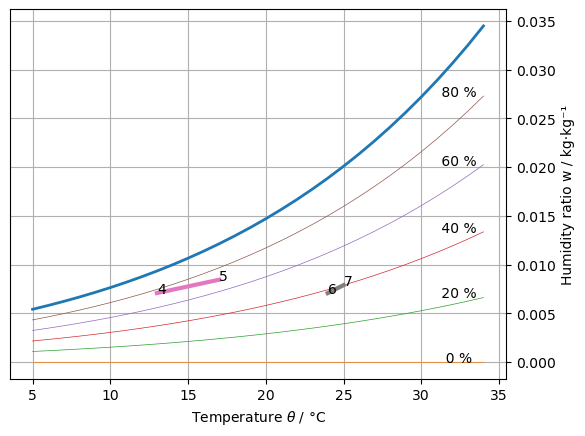

In [21]:
# Points        0  1  2  3  4  5  6  7  8       Process
A = np.array([[0, 0, 0, 0, -1, 1, 0, 0, 0],     # TZ1
              [0, 0, 0, 0, 0, 0, -1, 1, 0]])    # TZ2
θ = np.array([θO, θM2, θh, θCC, θS1, θTZ1, θS2, θTZ2, θM1])
w = np.array([wO, wM2, wh, wCC, wS1, wTZ1, wS2, wTZ2, wM1])
psy.chartA(θ, w, A, t_range)

### TZ1, TZ2, MR3

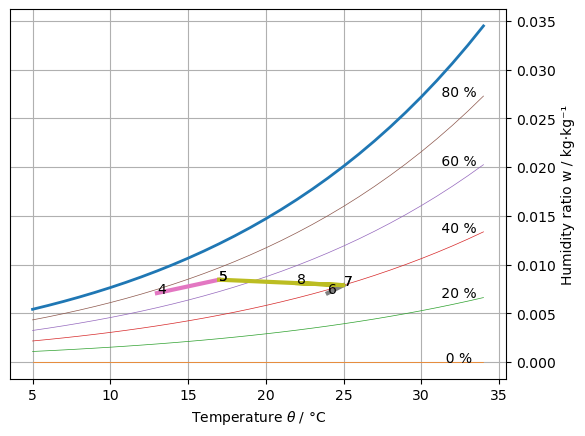

In [22]:
# Psychrometric chart TZ1, TZ2, MR3
# Points        0  1  2  3  4  5  6  7  8       Process
A = np.array([[0, 0, 0, 0, -1, 1, 0, 0, 0],     # TZ1
              [0, 0, 0, 0, 0, 0, -1, 1, 0],     # TZ2
              [0, 0, 0, 0, 0, -1, 0, -1, 1]])   # MR3 TZ1 & TZ2
θ = np.array([θO, θM2, θh, θCC, θS1, θTZ1, θS2, θTZ2, θM1])
w = np.array([wO, wM2, wh, wCC, wS1, wTZ1, wS2, wTZ2, wM1])
psy.chartA(θ, w, A, t_range)

### TZ1, TZ2, MR3, MR1

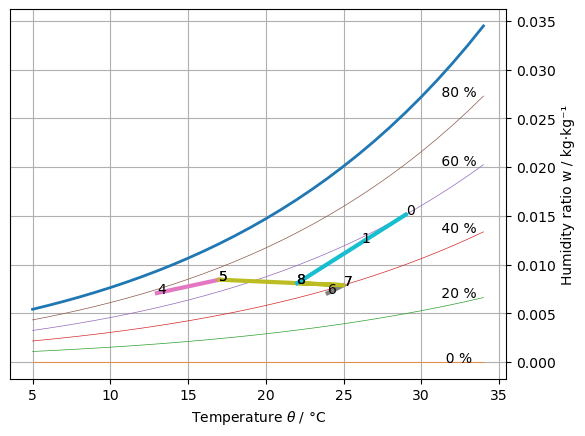

In [23]:
# Psychrometric chart TZ1, TZ2, MR3, MR1
# Points        0  1  2  3  4  5  6  7  8       Process
A = np.array([[0, 0, 0, 0, -1, 1, 0, 0, 0],     # TZ1
              [0, 0, 0, 0, 0, 0, -1, 1, 0],     # TZ2
              [0, 0, 0, 0, 0, -1, 0, -1, 1],    # MR3 TZ1 & TZ2
              [-1, 1, 0, 0, 0, 0, 0, 0, 1]])    # MR1 E & M3
θ = np.array([θO, θM2, θh, θCC, θS1, θTZ1, θS2, θTZ2, θM1])
w = np.array([wO, wM2, wh, wCC, wS1, wTZ1, wS2, wTZ2, wM1])
psy.chartA(θ, w, A, t_range)

### TZ1, TZ2, MR3, MR1, CC

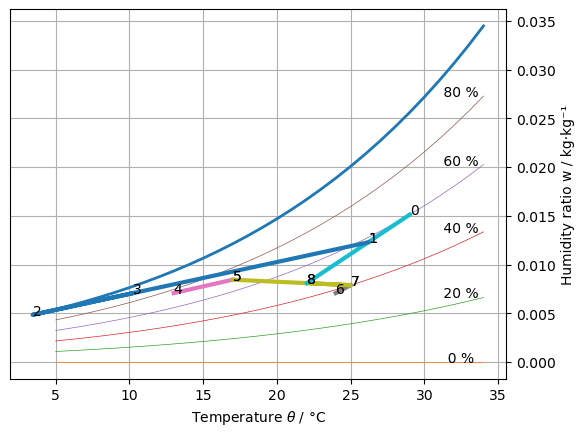

In [24]:
# Psychrometric chart TZ1, TZ2, MR3, MR1, CC
# Points        0  1  2  3  4  5  6  7  8       Process
A = np.array([[0, 0, 0, 0, -1, 1, 0, 0, 0],     # TZ1
              [0, 0, 0, 0, 0, 0, -1, 1, 0],     # TZ2
              [0, 0, 0, 0, 0, -1, 0, -1, 1],    # MR3 TZ1 & TZ
              [-1, 1, 0, 0, 0, 0, 0, 0, 1],     # MR1 E & M3
              [0, -1, -1, 1, 0, 0, 0, 0, 0]])   # CC
θ = np.array([θO, θM2, θh, θCC, θS1, θTZ1, θS2, θTZ2, θM1])
w = np.array([wO, wM2, wh, wCC, wS1, wTZ1, wS2, wTZ2, wM1])
psy.chartA(θ, w, A, t_range)

### TZ1, TZ2, MR3, MR1, CC, HC1, HC2

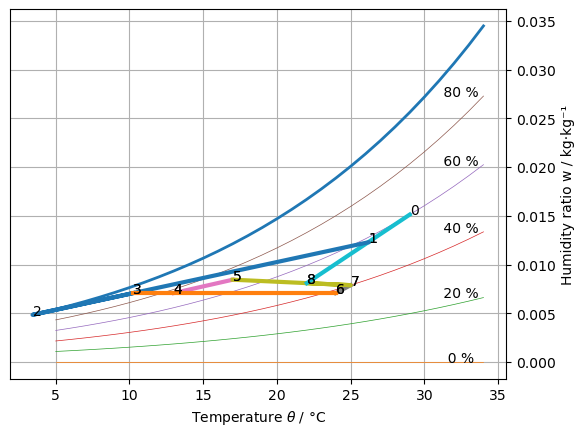

In [25]:
# Psychrometric chart TZ1, TZ2, MR3, MR1, CC, HC1, HC2
# Points        0  1  2  3  4  5  6  7  8       Process
A = np.array([[0, 0, 0, 0, -1, 1, 0, 0, 0],     # TZ1
              [0, 0, 0, 0, 0, 0, -1, 1, 0],     # TZ2
              [0, 0, 0, 0, 0, -1, 0, -1, 1],    # MR3 TZ1&TZ2
              [-1, 1, 0, 0, 0, 0, 0, 0, 1],     # MR1 E & M3
              [0, -1, -1, 1, 0, 0, 0, 0, 0],    # CC
              [0, 0, 0, -1, 1, 0, 1, 0, 0]])    # HC1, HC2
θ = np.array([θO, θM2, θh, θCC, θS1, θTZ1, θS2, θTZ2, θM1])
w = np.array([wO, wM2, wh, wCC, wS1, wTZ1, wS2, wTZ2, wM1])
psy.chartA(θ, w, A, t_range)

# Solution winter: heating and humidification

![2zones](./Figures/2zones_heat.svg)
> Figure 3. Heating and humidification model of air conditioning system for two thermal zones

## Data

The indoor conditions
- $\theta_{TZ1}$ -  dry-bulb temperature zone 1, °C
- $\varphi_{TZ1}$ - relative humidity zone 1, -
- $\theta_{TZ2}$ -  dry-bulb temperature zone 2, °C
- $\varphi_{TZ2}$ - relative humidity zone 2, -

and
- $\dot{m}_{O}$ - mass flow rate outdoor air, kg/s

are the same as in summer.

The outdoor conditons are different.
- $\theta_{O}$ -  dry-bulb temperature outdoor air, °C
- $\varphi_{O}$ - relative humidity outdoor air, -
- $\dot{m}_{O}$ - mass flow rate outdoor air, kg/s

In [26]:
# Outdoor air
θO = 0                      # °C, dry-bulb temperature
ϕO = 1.00                   # -, relative humidity

wO = psy.w(θO, ϕO)          # kg_v/kg_da, humidity ratio outdoor air

## Loads of thermal zones

The sensible load of a zone is:

$$\dot Q_s = (UA + \dot m_i c)(\theta_O - \theta_I)  + \dot{Q}_{s,a}$$

and the latent load is: 

$$\dot Q_l = \dot m_i l (w_O - w_I) + \dot{Q}_{l,a}$$

In [27]:
QsTZ1 = (U * A1 + mi1 * ca) * (θO - θTZ1) + Qsa1
QsTZ2 = (U * A2 + mi2 * ca) * (θO - θTZ2) + Qsa2

QlTZ1 = mi1 * lv * (wO - wTZ1) + Qla1
QlTZ2 = mi2 * lv * (wO - wTZ2) + Qla2

print(f"Summer loads TZ1: sensible {QsTZ1:.0f} W; \t latent {QlTZ1:.0f} W")
print(f"Summer loads TZ2: sensible {QsTZ2:.0f} W; \t latent {QlTZ2:.0f} W")

Summer loads TZ1: sensible -452 W; 	 latent -206 W
Summer loads TZ2: sensible -1278 W; 	 latent -369 W


Round up the loads to the nearest multiple of 250:

In [28]:
QsTZ1 = float(np.floor(QsTZ1 / 250) * 250)
QsTZ2 = float(np.floor(QsTZ2 / 250) * 250)
QlTZ1 = float(np.floor(QlTZ1 / 250) * 250)
QlTZ2 = float(np.floor(QlTZ2 / 250) * 250)

print(f"Summer loads TZ1: sensible {QsTZ1:.0f} W; \t latent {QlTZ1:.0f} W")
print(f"Summer loads TZ2: sensible {QsTZ2:.0f} W; \t latent {QlTZ2:.0f} W")

Summer loads TZ1: sensible -500 W; 	 latent -250 W
Summer loads TZ2: sensible -1500 W; 	 latent -500 W


## Supply air conditions for thermal zones

From the equations of **TZ1**:
$$
\left\{\begin{matrix}
 \dot{m}_1 c \theta_{S1} + \dot{Q}_{sS1} = \dot{m}_1 c \theta_{I1}
 \\ 
 \dot{m}_1 l w_{S1} + \dot{Q}_{lS1} = \dot{m}_1 l w_{I1}
\end{matrix}\right.
$$

and of of **TZ2**:

$$
\left\{\begin{matrix}
 \dot{m}_2 c \theta_{S2} + \dot{Q}_{sS2} = \dot{m}_2 c \theta_{I2}
 \\ 
 \dot{m}_2 l w_{S2} + \dot{Q}_{lS2} = \dot{m}_2 l w_{I2}
\end{matrix}\right.
$$

get the conditions of supply air for **TZ1**: $\theta_{S1}$, $w_{S1}$, and for **TZ2**: $\theta_{S2}$, and $w_{S2}$.

In [29]:
θS1 = θTZ1 - QsTZ1 / (m1 * ca)
wS1 = wTZ1 - QlTZ1 / (m1 * lv)

θS2 = θTZ2 - QsTZ2 / (m2 * ca)
wS2 = wTZ2 - QlTZ2 / (m2 * lv)
print(f"S1: {θS1:.2f} °C; {wS1:.6f} kg_v/kg_da")
print(f"S2: {θS2:.2f} °C; {wS2:.6f} kg_v/kg_da")

S1: 18.14 °C; 0.008669 kg_v/kg_da
S2: 27.03 °C; 0.008151 kg_v/kg_da


## Heating coils loads

From the equations of **MR2**,

$$
\left\{\begin{matrix}
 (\dot{m} - \dot{m}_E) c \theta_{M1} + \dot{m}_E c \theta_{E} = \dot{m} c \theta_{M2}
 \\ 
 (\dot{m} - \dot{m}_E) l w_{M1} + \dot{m}_E l w_{E} = \dot{m} l w_{M2}
\end{matrix}\right.
$$

calculate $\theta_{M2}$ and $w_{M2}$.

In [30]:
θM2 = ((m - mO) * θM1 + mO * θO) / m
wM2 = ((m - mO) * wM1 + mO * wO) / m

From the equations of heating coil **HC1**

$$
\dot{m}_1 c \theta_{M2} + \dot{Q}_{s,HC1} = \dot{m}_1 c \theta_{S1}
$$

heating coil **HC2**

$$
\dot{m}_2c \theta_{M2} + \dot{Q}_{s,HC2} = \dot{m}_1 c \theta_{S2}
$$

obtain the loads of the heating coils.

In [31]:
QsHC1 = m1 * ca * (θS1 - θM2)
QsHC2 = m2 * ca * (θS2 - θM2)

print(f"HC1 load: {QsHC1:.0f} W")
print(f"HC2 load: {QsHC2:.0f} W")

HC1 load: 4037 W
HC2 load: 13380 W


## Vapor humidifiers loads and water mass flow rates

From the equations of the vapor humidifier **VH1**

$$
\dot{m}_1 l w_{M2} + \dot{Q}_{l,VH1} = \dot{m}_1 l w_{S1}
$$

and of the vapor humidifier **VH2**

$$
\dot{m}_2 l w_{M2} + \dot{Q}_{l,VH2} = \dot{m}_1 l w_{S2}
$$

obtain the loads of the vapor humidifiers and the mass flow rate of water vapor:

$$
\dot{m}_{v1} = \dot{Q}_{l,VH1} / l
$$

$$
\dot{m}_{v2} = \dot{Q}_{l,VH2} / l
$$


In [32]:
QlVH1 = m1 * lv * (wS1 - wM2)
QlVH2 = m2 * lv * (wS2 - wM2)

mv1 = QlVH1 / lv
mv2 = QlVH2 / lv

print(f"VH1 load: {QlVH1:.0f} W")
print(f"VH2 load: {QlVH2:.0f} W")
print(f"VH1 mass flow rate: {mv1:.5f} kg/s")
print(f"VH2 mass flow rate: {mv2:.5f} kg/s")

VH1 load: 3438 W
VH2 load: 4849 W
VH1 mass flow rate: 0.00138 kg/s
VH2 mass flow rate: 0.00194 kg/s


## Processes on psychrometric chart

![2zones](./Figures/2zones_heat_number.svg)
> Figure 4. Heating and humidification model of air conditioning system for two thermal zones with the points numbered.

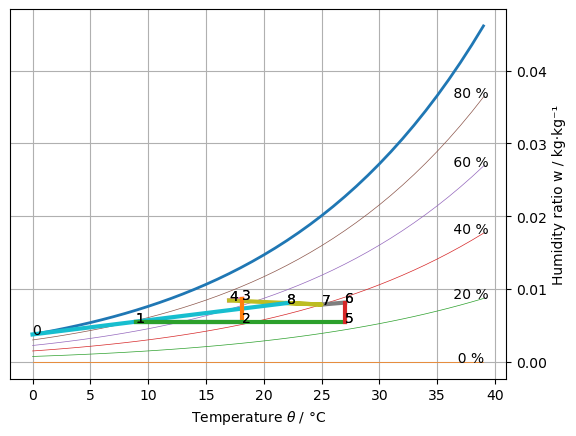

In [33]:
# Psychrometric chart TZ1, TZ2, MR1, MR2, HC1, VH1, HC2, VH2
t_range = np.arange(0, 40, 1)
# Points        0  1  2  3  4  5  6  7  8       Process
A = np.array([[0, 0, 0, -1, 1, 0, 0, 0, 0],     # TZ1
              [0, 0, 0, 0, 0, 0, -1, 1, 0],     # TZ2
              [0, 0, 0, 0, -1, 0, 0, -1, 1],    # MR1: TZ1 & TZ2
              [-1, 1, 0, 0, 0, 0, 0, 0, -1],    # MR2: E & M1
              [0, -1, 1, 0, 0, 0, 0, 0, 0],     # HC1
              [0, 0, -1, 1, 0, 0, 0, 0, 0],     # VH1
              [0, -1, 0, 0, 0, 1, 0, 0, 0],     # HC2
              [0, 0, 0, 0, 0, -1, 1, 0, 0],     # VH2
              ])
θ = np.array([θO, θM2, θS1, θS1, θTZ1, θS2, θS2, θTZ2, θM1])
w = np.array([wO, wM2, wM2, wS1, wTZ1, wM2, wS2, wTZ2, wM1])
psy.chartA(θ, w, A, t_range)